In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos del TP de CMI

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.
1. **Optimo**

# Métodos
Los métodos evaluados en este notebook son los siguientes:
- **GS**: Fuerza Bruta.
- **GE**: Backtracking con podas por optimalidad y factibilidad.
- **GB**: 
- **TS**: Tabu search.

# Experimentos
Leemos el dataframe con todos los resultados.

In [82]:
df_resultados = pd.read_csv("..\\results\\resultado.csv");

In [83]:
agg_funcs = {   "tiempo":"mean",
                "impacto":"mean",
                "cant_colores": "mean",
                "longitud_tabu": "mean",
                "tipo_memoria": "first",
                "porcentaje_vecindad": "mean"}
df_resultados = df_resultados.groupby(['dataset','n','mG','mH','metodo']).aggregate(agg_funcs).reset_index()

## Experimento 1: Heuristicas con optimo conocido

In [84]:
df_optimo_heuristicas = df_resultados[(df_resultados["dataset"] == "optimo")];
df_optimo_heuristicas = df_optimo_heuristicas[(df_resultados["metodo"]=="GS") |
                                              (df_resultados["metodo"]=="GE") |
                                              (df_resultados["metodo"]=="GB") |
                                              (df_resultados["metodo"]=="OPTIMO")
                                             ].copy();
df_optimo_heuristicas

c:\users\tomas\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,dataset,n,mG,mH,metodo,tiempo,impacto,cant_colores,longitud_tabu,tipo_memoria,porcentaje_vecindad
0,optimo,6,7,2,GB,0.000,1.0,3.0,0,none,0
1,optimo,6,7,2,GE,0.000,1.0,5.0,0,none,0
2,optimo,6,7,2,GS,0.000,1.0,3.0,0,none,0
3,optimo,6,7,2,OPTIMO,0.000,1.0,4.0,0,none,0
4,optimo,8,8,8,GB,0.000,6.0,2.0,0,none,0
5,optimo,8,8,8,GE,0.000,5.0,3.0,0,none,0
6,optimo,8,8,8,GS,0.000,6.0,2.0,0,none,0
7,optimo,8,8,8,OPTIMO,0.000,6.0,2.0,0,none,0
8,optimo,10,20,5,GB,1.000,2.0,4.0,0,none,0
9,optimo,10,20,5,GE,0.000,3.0,7.0,0,none,0


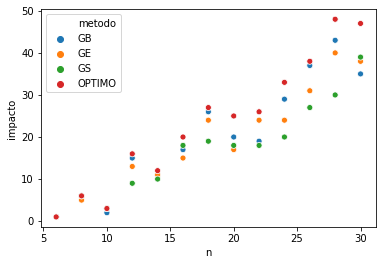

In [85]:
# Acercamos un poco la lupa para ver la diferencia entre BT y BT-O.
fig = sns.scatterplot(data=df_optimo_heuristicas, x='n', y='impacto', hue='metodo');
fig.set(xlabel='n', ylabel='impacto');
#plt.savefig("..\\graphs\\.svg");

In [86]:
agg_funcs = {   "tiempo":"mean",
                "impacto":"max",
                "cant_colores": "mean",
                "longitud_tabu": "mean",
                "tipo_memoria": "first",
                "porcentaje_vecindad": "mean"}
df_optimo_heuristicas_max = df_optimo_heuristicas.groupby(['dataset','n','mG','mH']).aggregate(agg_funcs).reset_index()
df_optimo_heuristicas_max = df_optimo_heuristicas_max.append([df_optimo_heuristicas_max]*3,ignore_index=True)
df_optimo_heuristicas_max = df_optimo_heuristicas_max.sort_values('n').reset_index()
df_optimo_heuristicas['max'] = df_optimo_heuristicas_max['impacto']

In [89]:
df_optimo_heuristicas['diff_relativa'] = df_optimo_heuristicas.apply(lambda r: (r['max']-r['impacto'])/r['max'], axis=1)
df_optimo_heuristicas = df_optimo_heuristicas[df_optimo_heuristicas['metodo'] != 'OPTIMO']

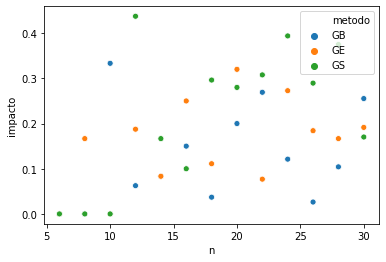

In [90]:
# Acercamos un poco la lupa para ver la diferencia entre BT y BT-O.
fig = sns.scatterplot(data=df_optimo_heuristicas, x='n', y='diff_relativa', hue='metodo');
fig.set(xlabel='n', ylabel='impacto');
#plt.savefig("..\\graphs\\.svg");